In [78]:
import wave
from pydub import AudioSegment
from pydub.silence import detect_nonsilent
import io
import collections
import contextlib
import math
import matplotlib.pyplot as plt
import pandas as pd

In [88]:
%%time
audio_bytes = wave.open('./20220401/20220401_194510_voice.wav','rb')
Freq = 16000
audio_bytes = audio_bytes.readframes(14400000)

# Convert wav to audio_segment
audio_segment = AudioSegment.from_raw(
    io.BytesIO(audio_bytes),
    sample_width=2,
    frame_rate=Freq,
    channels=1
)
nonsilent_data = detect_nonsilent(
    audio_segment,
    min_silence_len=600,
    silence_thresh=-37,
    seek_step=1
)
remove_list = []
for i in nonsilent_data:
    if ((i[1] - i[0]) < 350):
        remove_list.append(i)
for i in remove_list:
    nonsilent_data.remove(i)
header = audio_bytes[:70]
user_talk_time = nonsilent_data

pTime = 100
time_list = list(range(0,math.ceil(nonsilent_data[-1][-1]/pTime)))
time_per_1s = [[time_list[i]*pTime, time_list[i+1]*pTime]  for i in range(0,len(time_list)-1)]

audio_seg_u = []
for i in time_per_1s:
    a = i[0] * 32 + 16000
    b = i[1] * 32 + 16000
    audio_seg_u.append(AudioSegment.from_raw(
      io.BytesIO(header + audio_bytes[a:b]),
      sample_width=2,
      frame_rate=Freq,
      channels=1
    ))


    volumes = []
    for i in range(len(audio_seg_u)):
        volumes.append(audio_seg_u[i].dBFS)



CPU times: user 1min 13s, sys: 134 ms, total: 1min 13s
Wall time: 1min 13s


In [89]:
df = pd.DataFrame(volumes,columns=['volumes'])

<AxesSubplot:>

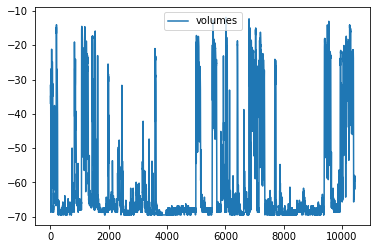

In [90]:
df.plot()

<AxesSubplot:>

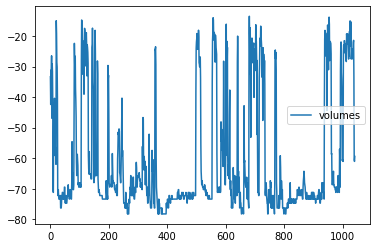

In [87]:
df.plot()

<AxesSubplot:>

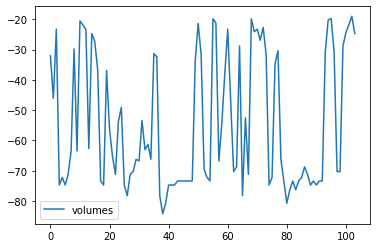

In [81]:
df.plot()